In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# The goal is to understand the relationship between house features and how these variables affect the house price.Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model.

In [2]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.shape

(414, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [7]:
df["Number of convenience stores"].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

In [8]:
df["Number of bedrooms"].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

# Checking for Null Values

In [9]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

There are no Missing values in this Data

# Checking for Duplicates

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [12]:
df.isnull().sum()

Transaction_date                          0
House_Age                                 0
Distance_from_nearest_Metro_station_km    0
Number_of_convenience_stores              0
latitude                                  0
longitude                                 0
Number_of_bedrooms                        0
House_size_sqft                           0
House_price_of_unit_area                  0
dtype: int64

# UNI-VARIATE &BI-VARIATE ANALYSIS

The skewness of the House_Age is0.38292623077299737
The skewness of the Distance_from_nearest_Metro_station_kmis1.8887565801256048
The skewness of the Number_of_convenience_stores is0.15460656758377123
The skewness of the latitude is-0.4385984450390504
The skewness of the longitude is-1.2195914979891498
The skewness of the Number_of_bedrooms is0.022309017612164857
The skewness of the House_size_sqft is-0.11362728091036625
The skewness of the House_price_of_unit_area is0.5998525842660576


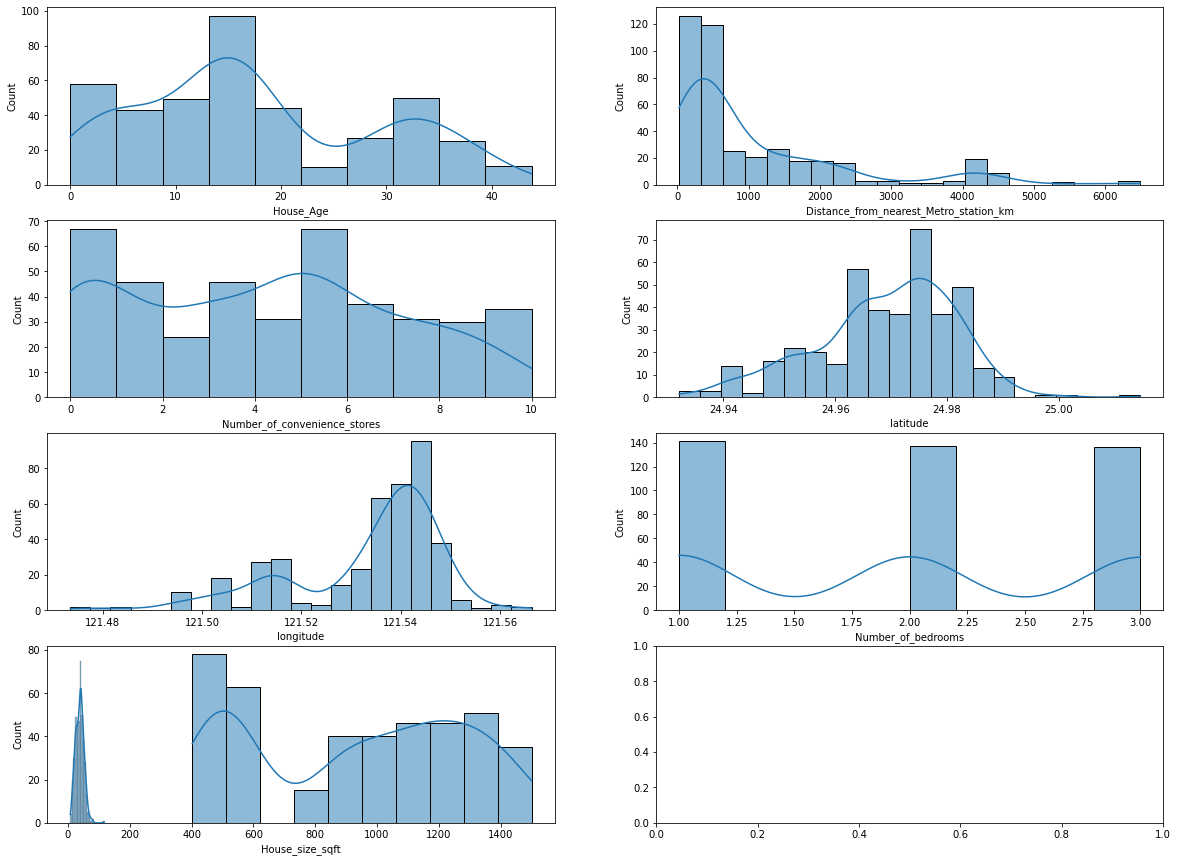

In [13]:
print("The skewness of the House_Age is{x}".format(x=df["House_Age"].skew()))
print("The skewness of the Distance_from_nearest_Metro_station_kmis{x}".format(x=df["Distance_from_nearest_Metro_station_km"].skew()))
print("The skewness of the Number_of_convenience_stores is{x}".format(x=df["Number_of_convenience_stores"].skew()))
print("The skewness of the latitude is{x}".format(x=df["latitude"].skew()))
print("The skewness of the longitude is{x}".format(x=df["longitude"].skew()))
print("The skewness of the Number_of_bedrooms is{x}".format(x=df["Number_of_bedrooms"].skew()))
print("The skewness of the House_size_sqft is{x}".format(x=df["House_size_sqft"].skew()))
print("The skewness of the House_price_of_unit_area is{x}".format(x=df["House_price_of_unit_area"].skew()))


fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df["House_Age"],kde=True,ax=axes[0][0])
sns.histplot(df["Distance_from_nearest_Metro_station_km"],kde=True,ax=axes[0][1])
sns.histplot(df["Number_of_convenience_stores"],kde=True,ax=axes[1][0])
sns.histplot(df["latitude"],kde=True,ax=axes[1][1])
sns.histplot(df["longitude"],kde=True,ax=axes[2][0])
sns.histplot(df["Number_of_bedrooms"],kde=True,ax=axes[2][1])
sns.histplot(df["House_size_sqft"],kde=True,ax=axes[3][0])
sns.histplot(df["House_price_of_unit_area"],kde=True,ax=axes[3][0])
plt.show()


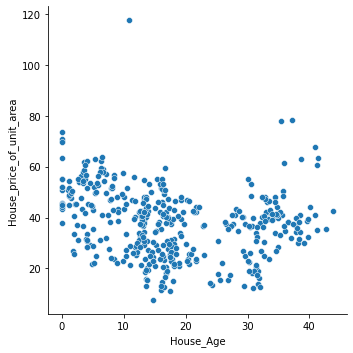

In [14]:
sns.relplot(data=df, x="House_Age", y="House_price_of_unit_area")

WE CAN SEE THAT House_price_of_unit_area Slowly falling with respect to House_Age

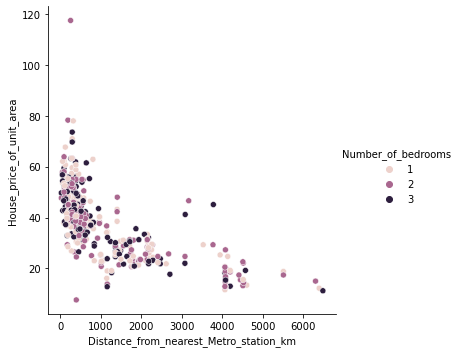

In [15]:
sns.relplot(
    data=df, x="Distance_from_nearest_Metro_station_km", y="House_price_of_unit_area", hue="Number_of_bedrooms",
)


from the Above graph we can predict that with respect to the distance from the metrostation House_price slowly Varying

# Multi-Variate Analysis

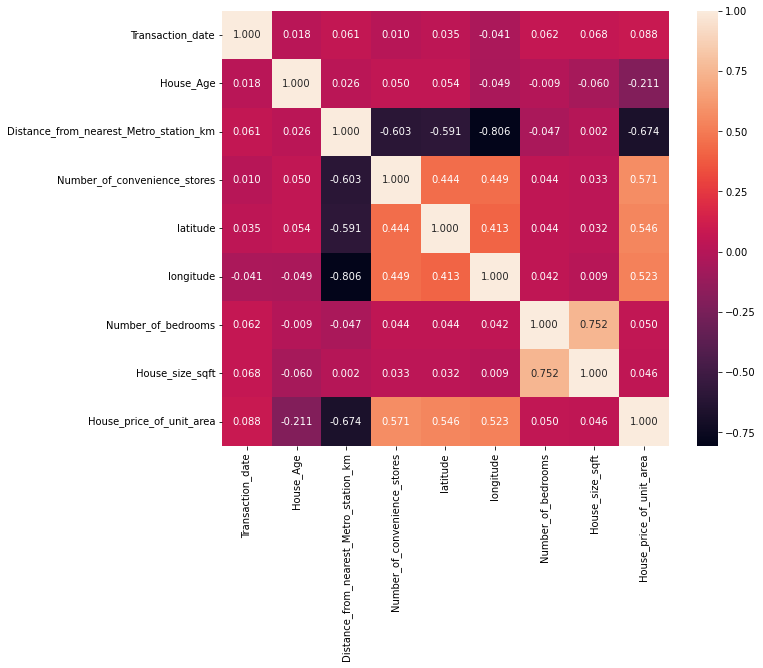

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".3f");

# Outlier Treatment

<AxesSubplot:>

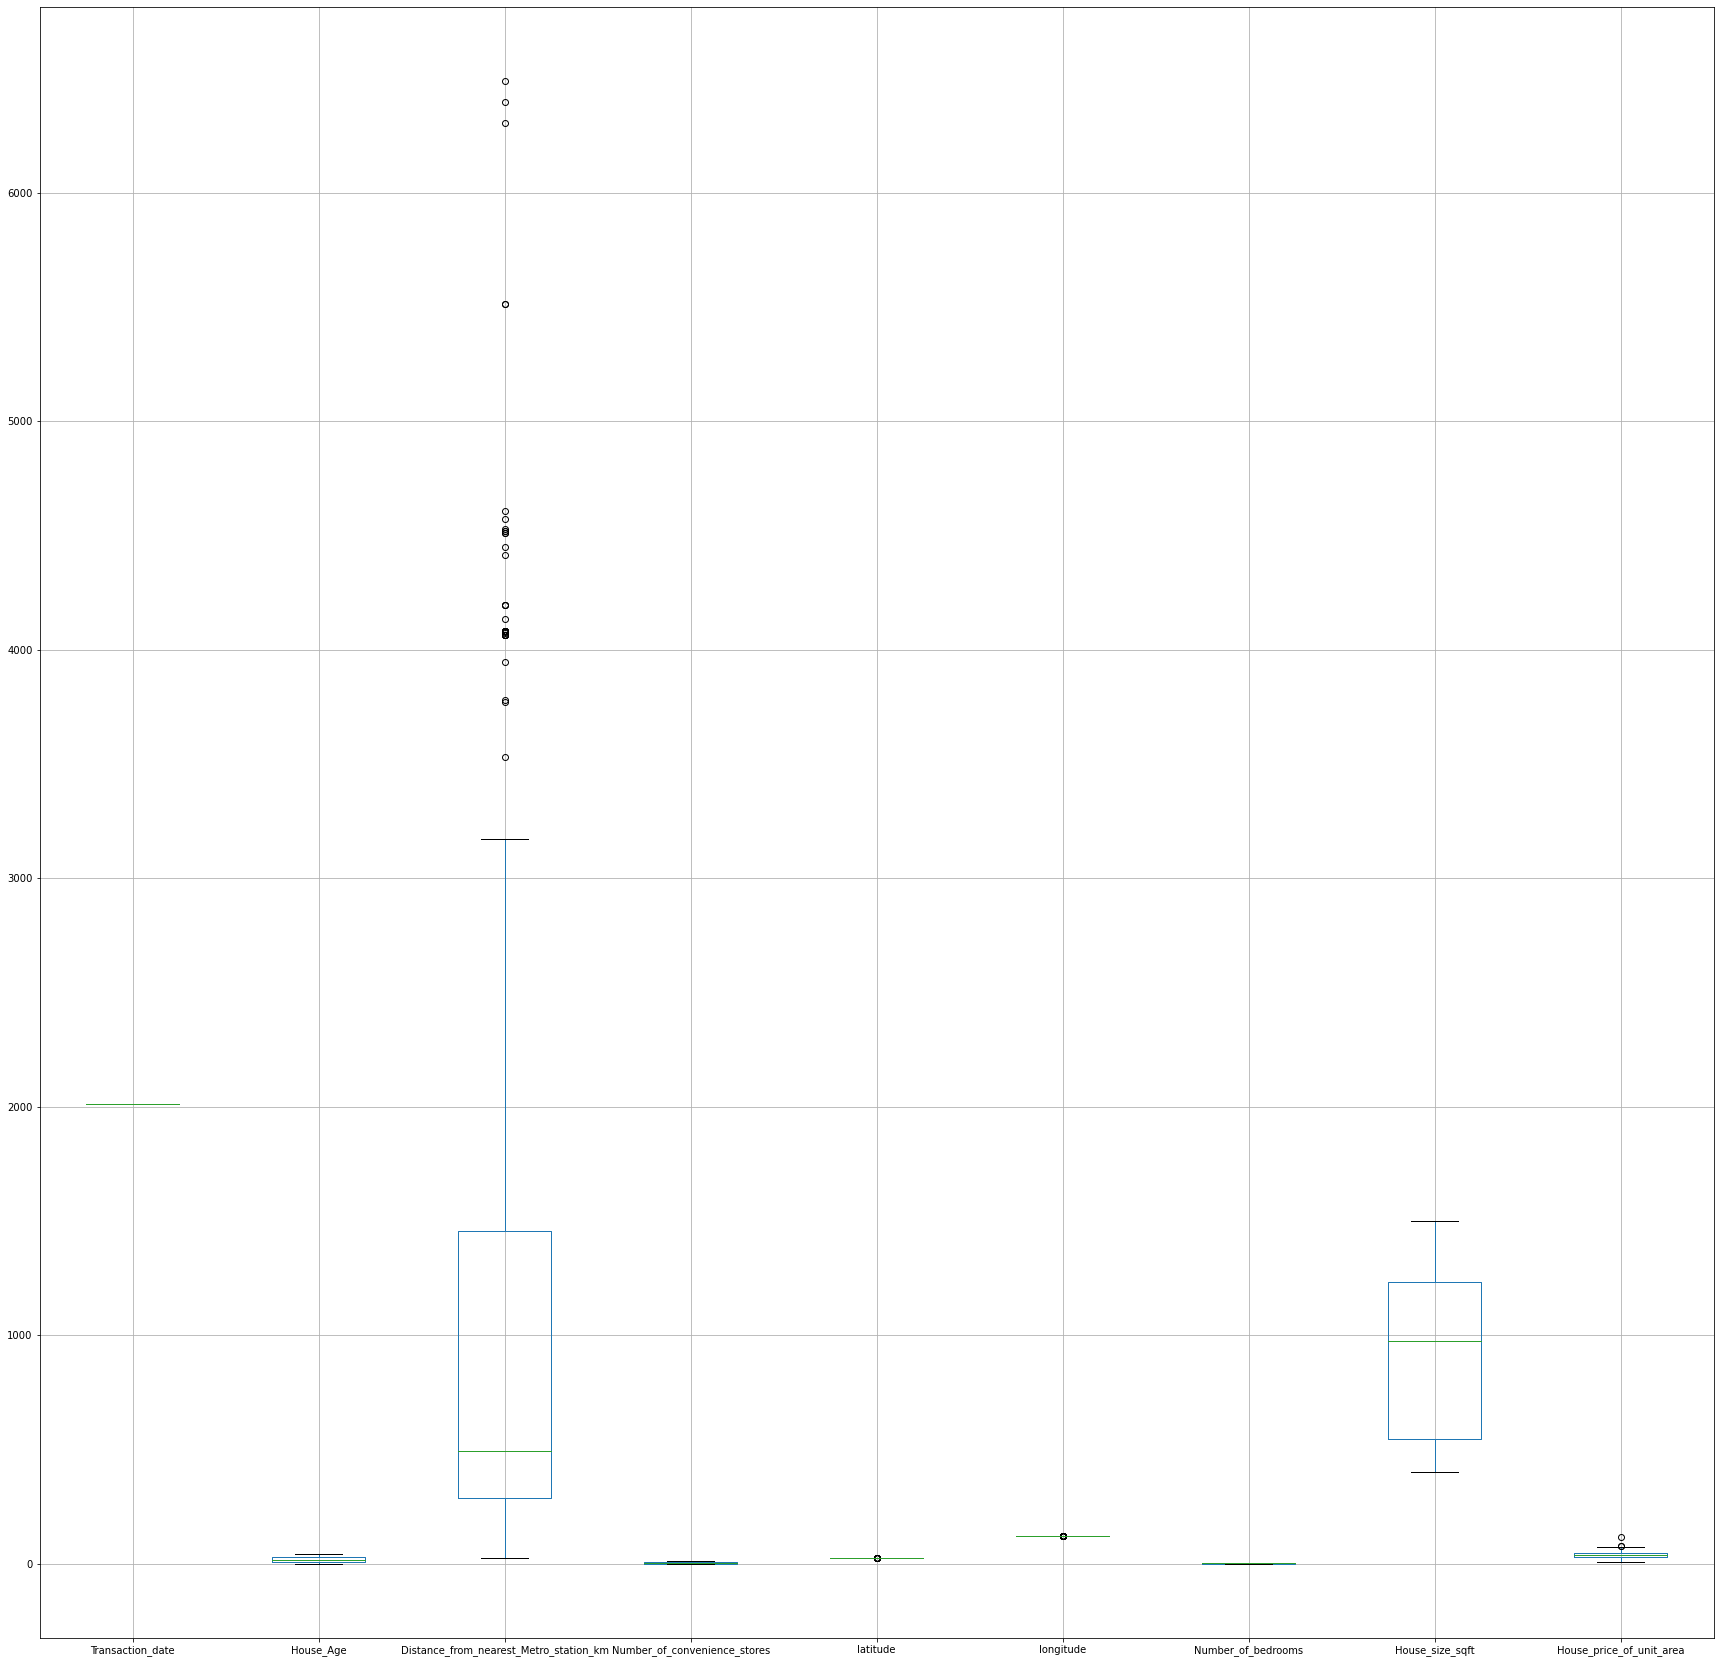

In [17]:
plt.figure(figsize=(30,30))
df.boxplot()

From the above boxplot we can see that" Distance_from_nearest_Metro_station_km"&"House_price_of_unit_area  ,are having outliers.we have to Treat them
We can remove the  transaction date.Because its not really making any changes in data

In [18]:
df.drop(["Transaction_date"],axis=1,inplace=True)

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
lrincome,urincome=remove_outlier(df["Distance_from_nearest_Metro_station_km"])
df["Distance_from_nearest_Metro_station_km"]=np.where(df["Distance_from_nearest_Metro_station_km"]>urincome,urincome,df["Distance_from_nearest_Metro_station_km"])
df["Distance_from_nearest_Metro_station_km"]=np.where(df["Distance_from_nearest_Metro_station_km"]<lrincome,lrincome,df["Distance_from_nearest_Metro_station_km"])

lrtravel,urtravel=remove_outlier(df["House_price_of_unit_area"])
df["House_price_of_unit_area"]=np.where(df["House_price_of_unit_area"]>urtravel,urtravel,df["House_price_of_unit_area"])
df["House_price_of_unit_area"]=np.where(df["House_price_of_unit_area"]<lrtravel,lrtravel,df["House_price_of_unit_area"])


<AxesSubplot:>

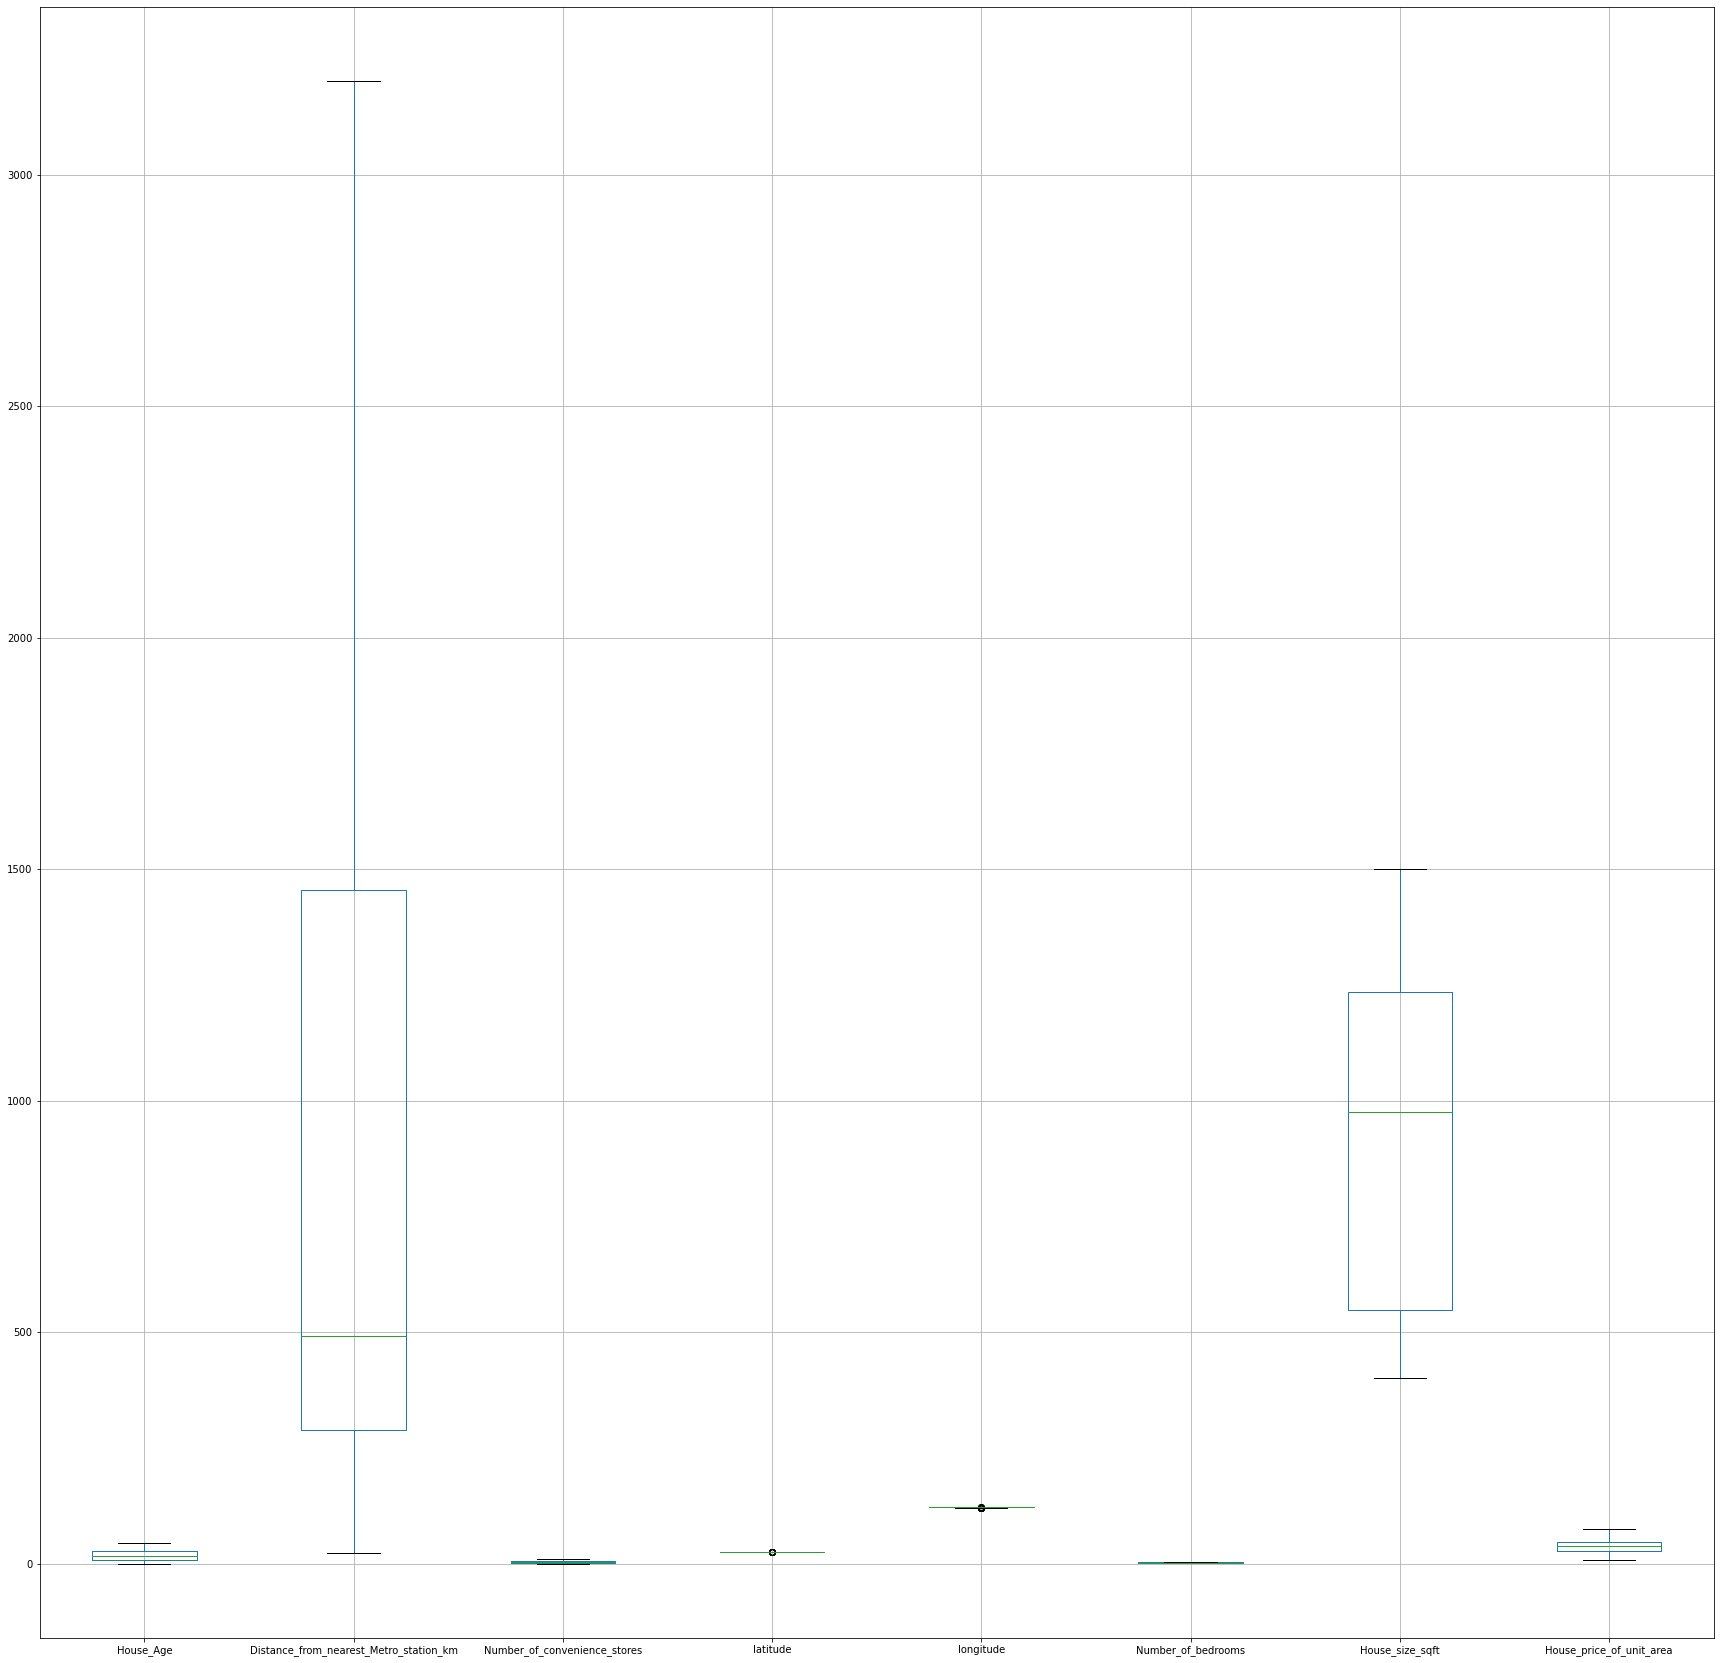

In [21]:
plt.figure(figsize=(30,30))
df.boxplot()

Outliers are Remove from Data.

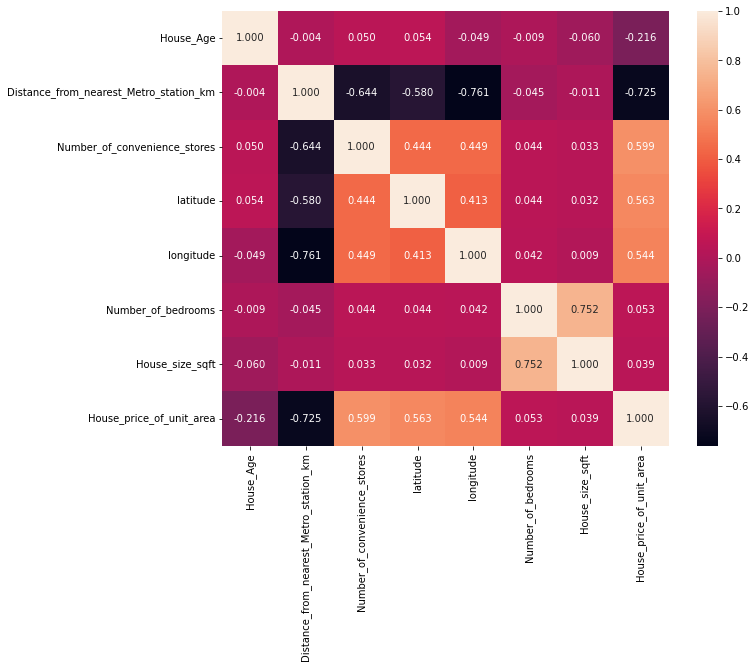

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".3f");

# Let split the data into Train and test

In [24]:
df["House_price_of_unit_area"]=df["House_price_of_unit_area"].apply(np.int64)

In [25]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

X = df.drop('House_price_of_unit_area',axis = 1)
y = df['House_price_of_unit_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

# Linear Regression Model:

In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
import statsmodels.formula.api as sm

data_train = pd.concat([X_train, y_train], axis=1)
lm = sm.ols(formula= 'House_price_of_unit_area~ House_Age+Distance_from_nearest_Metro_station_km+Number_of_convenience_stores+Number_of_bedrooms+House_size_sqft+latitude+longitude', data = data_train).fit()
lm.params

Intercept                                -4650.564991
House_Age                                   -0.230186
Distance_from_nearest_Metro_station_km      -0.006318
Number_of_convenience_stores                 0.953576
Number_of_bedrooms                           2.517212
House_size_sqft                             -0.005270
latitude                                   220.605966
longitude                                   -6.697464
dtype: float64

In [28]:
print(lm.summary())

                               OLS Regression Results                               
Dep. Variable:     House_price_of_unit_area   R-squared:                       0.637
Model:                                  OLS   Adj. R-squared:                  0.628
Method:                       Least Squares   F-statistic:                     65.54
Date:                      Sun, 27 Nov 2022   Prob (F-statistic):           6.37e-54
Time:                              16:43:12   Log-Likelihood:                -931.40
No. Observations:                       269   AIC:                             1879.
Df Residuals:                           261   BIC:                             1908.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [30]:
regression_model.score(X_test, y_test)

0.6070865732626295

<AxesSubplot:xlabel='latitude', ylabel='House_price_of_unit_area'>

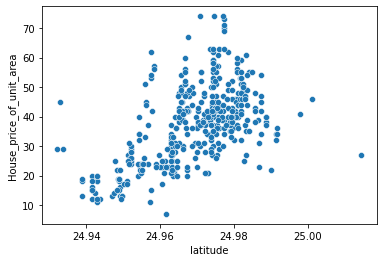

In [31]:
sns.scatterplot(df['latitude'],df['House_price_of_unit_area'])

<AxesSubplot:xlabel='Number_of_convenience_stores', ylabel='House_price_of_unit_area'>

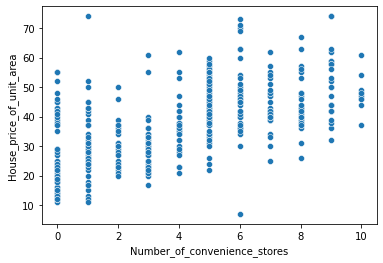

In [32]:
sns.scatterplot(df['Number_of_convenience_stores'],df['House_price_of_unit_area'])

<AxesSubplot:xlabel='House_price_of_unit_area', ylabel='Number_of_bedrooms'>

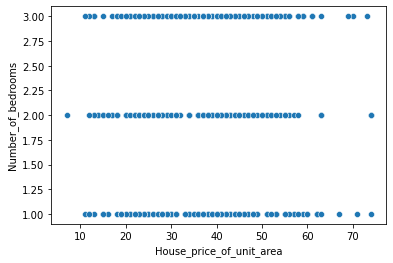

In [33]:
sns.scatterplot(df['House_price_of_unit_area'],df['Number_of_bedrooms'])

In [51]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [55]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          7.785447   8.440095        0.631761    0.623823
Decision Tree Regressor    0.000000   8.688383        1.000000    0.601365
Random Forest Regressor    2.574125   7.017203        0.959745    0.739968
ANN Regressor              4.164074   8.336842        0.894658    0.632970


# Looks Like ANN, DT, and RF are over-fitting, Let's Grid Search to get the best parameters

You can also visualise the tree and see where to prune it and decide the max_depth and other parameters

# Grid Search on Decision Tree

In [62]:
param_grid = {
    'max_depth': [10,15,20,25],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15}


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15

In [63]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [15, 30, 35, 40, 50]})

In [64]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15}


# Using Grid Search for Random Forest

In [65]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [67]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [68]:
print(grid_search.best_params_)

{'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


# Using Grid Search for ANN

In [69]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [70]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [71]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [72]:
annr= MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=7, max_features=4, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          7.785447   8.440095        0.631761    0.623823
Decision Tree Regressor    6.305612   7.183683        0.758444    0.727484
Random Forest Regressor    5.651988   6.850903        0.805927    0.752147
ANN Regressor              4.303046   8.544937        0.887510    0.614419


Text(0.5, 0, 'Random Forest Feature Importance')

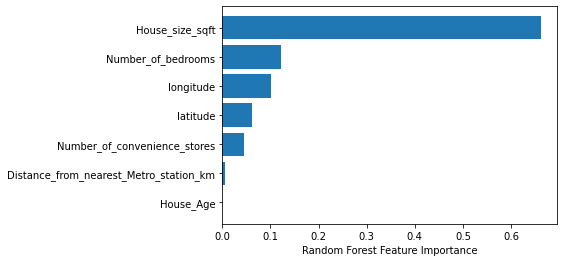

In [74]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(X_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
From tHE above graph we can conclude the importants of Features which are important to House_price_of_unit_area .


# Best model from The above ModelBuilding

By comparing all the above Data we can conclude Random Forest  in the Best model Cause it has Lower RMSE and better test score and Train score